<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Segmentación por clustering. Caso EM</h2>

### Mixtura de Gausianas - Expectación Maximización (EM)
#### Author: Pedro Latorre Carmona
#### Curso: 2024-2025

Versión 1.0

---

En esta práctica, la idea es aplicar el algoritmo de agrupamiento de EM a una imagen sin ruido, y a otra imagen a la que le vais a añadir ruido Gausiano de un determinado valor de *desviación estándar*.


### Mixtura de Gausianas (Mixture of Gaussians, o MoGs)

El algoritmo de mixtura de Gausianas intenta resolver e inferir cuáles son las características, número y peso de un conjunto de Gausianas, en un espacio $D-$dimensional que permitirían modelizar una determinada distribución de datos.

Supongamos un **vector de características** que representa un dato que queremos clasificar. La distribución de probabilidad de ese vector de características a lo largo del espacio que lo define se puede poner como:

$p(\mathbf{x}) = \sum_{j=1}^{m} p(\Omega_{j})\cdot p(\mathbf{x}|\Omega_{j})$

Una función Gausiana en un espacio $D-$dimensional puede escribirse de la siguiente forma:

$p(\mathbf{x}|\Omega_{j})=\frac{1}{(2\pi)^{\frac{d}{2}}|\Sigma_{j}|^{\frac{1}{2}}}\exp\left(-\frac{1}{2}([\mathbf{x}-\mathbf{\mu}_{j}]^{T}\Sigma_{j}^{-1}[\mathbf{x}-\mathbf{\mu}_{j}])\right)$

donde:

1. $\mathbf{\mu}_{j}$ es el vector que representa las coordenadas del **centroide** j-ésimo
2. $\Sigma_{j}$ es la matriz de covarianza asociada al *clúster* j-ésimo

## ¿Qué resuelve el algoritmo de mixtura de Gausianas?

Lo que indica es el grupo al que pertenece un vector, $\mathbf{x}$, porque busca:

$j\equiv\max_{j\in\Omega_{i}} \left\{p(\Omega_{j}|\mathbf{x})\right\}$

## Método de resolución

Normalmente, el método que se usa para resolver este problema de optimización es el denominado de **expectación**-**maximización** (**EM**). Consta de dos partes:

1. Paso **E** (Expectación):

<img src="pics/PasoE.png">

2. Paso **M** (Maximización):

<img src="pics/PasoM.png">

## ¿Cuándo *pararía* el algoritmo?

Hay diversas formas de establecer que el algoritmo ha **convergido**:

1. Considerar que los centroides, así como las matrices de covarianza, no han *cambiado*. Esto, en realidad, tendría que reflejarse en que:

$\|\Sigma_{j}^{(t+1)}-\Sigma_{j}^{(t)}\|_{2}\leq \epsilon_{1}, \forall j$

$\|\mathbf{\mu}_{j}^{(t+1)}-\mathbf{\mu}_{j}^{(t)}\|_{2}\leq \epsilon_{2}, \forall j$

Podemos considerar: $\epsilon_{1}=\epsilon_{2}=\epsilon$

2. Hacer un número máximo de iteraciones.

---

- Para el caso de la **Mixtura de Gausianas** habría que analizar:

    1. El número de Gausianas
    2. El valor del umbral de parada
    3. El número de iteraciones
    4. La forma de las matrices de covarianza
    5. El efecto del ruido de la imagen, en la calidad de la segmentación


Hay que usar el código que ya tiene **sklearn.mixture** de **Mixturas de Gausianas**.

---

---
### Adición de ruido Gausiano

Para añadir ruido Gausiano, podéis hacerlo de forma independiente en cada canal de color (R, G, B), siguiendo lo comentado (por ejemplo) en:

https://medium.com/@ms_somanna/guide-to-adding-noise-to-your-data-using-python-and-numpy-c8be815df524


In [3]:
%matplotlib inline

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage import io, util, color
from sklearn.mixture import GaussianMixture

c:\Users\urban\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, std_dev=25):
    noisy_image = util.random_noise(image, mode='gaussian', mean=mean, var=(std_dev/255)**2)
    plt.imshow(noisy_image)
    plt.axis('off')
    plt.title("Image with Gaussian Noise")
    plt.show()
    return noisy_image

In [14]:
# Function to segment the image using Gaussian Mixture Model (EM algorithm)
def segment_image(image, n_components=4, max_iter=100):
    # Convert image to grayscale for simplicity in segmentation
    grayscale_image = color.rgb2gray(image)
    pixels = grayscale_image.reshape(-1, 1)  # Flatten the image for GMM input

    # Apply Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, max_iter=max_iter, random_state=0)
    gmm.fit(pixels)
    segmented = gmm.predict(pixels)
    
    # Reshape the labels to the original image shape
    segmented_image = segmented.reshape(grayscale_image.shape)
    plt.imshow(segmented_image, cmap='viridis')
    plt.axis('off')
    plt.title("Segmented Image")
    plt.show()
    return segmented_image

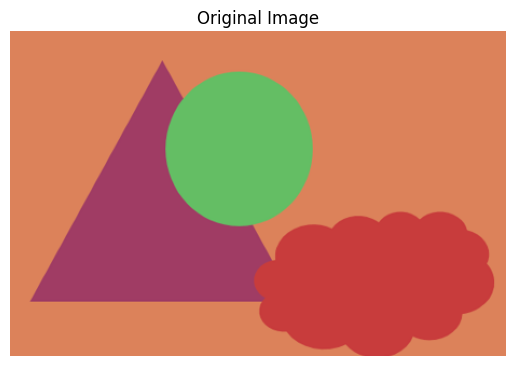

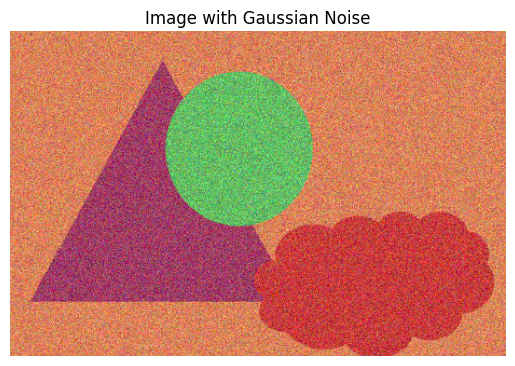

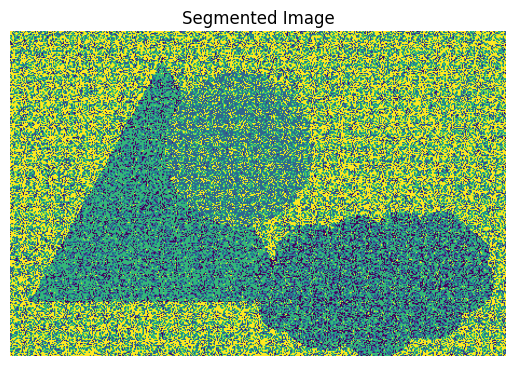

In [13]:
# Path to the user-provided image
image_path = 'Imagen-4Grupos-SinRuido-7Nov2024.png'

# Load the image
image = io.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()

# Add Gaussian noise
noisy_image = add_gaussian_noise(image)

# Segment the noisy image
segmented_image = segment_image(noisy_image, n_components=4)

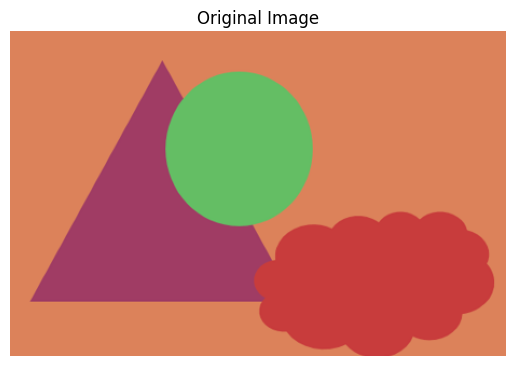

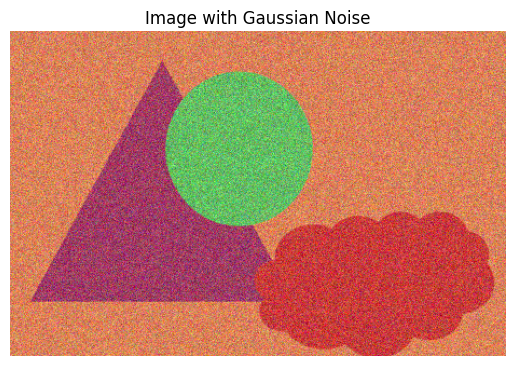

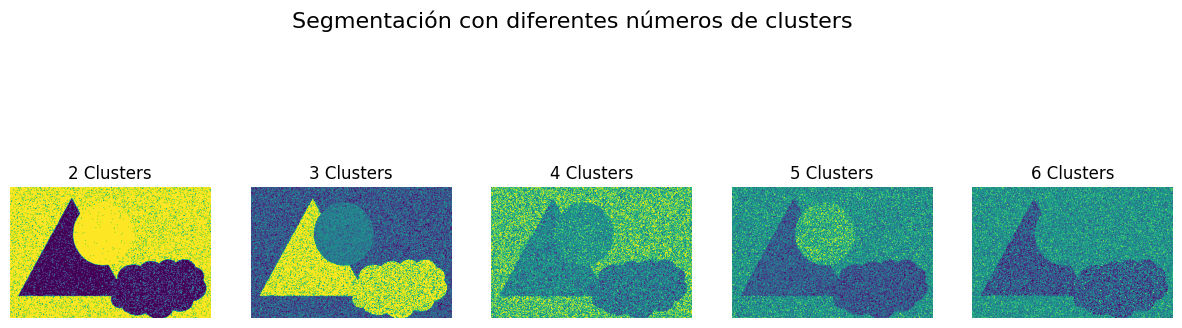

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, color
from sklearn.mixture import GaussianMixture

# Cargar y mostrar la imagen original
def load_image(url):
    image = io.imread(url)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Original Image")
    plt.show()
    return image

# Agregar ruido Gausiano a la imagen
def add_gaussian_noise(image, mean=0, std_dev=25):
    noisy_image = util.random_noise(image, mode='gaussian', mean=mean, var=(std_dev/255)**2)
    plt.imshow(noisy_image)
    plt.axis('off')
    plt.title("Image with Gaussian Noise")
    plt.show()
    return noisy_image

# Ejecutar el experimento variando el número de clusters y mostrando los resultados
def experiment_varying_clusters(image, max_clusters=6, max_iter=100):
    grayscale_image = color.rgb2gray(image)
    pixels = grayscale_image.reshape(-1, 1)

    fig, axes = plt.subplots(1, max_clusters - 1, figsize=(15, 5))
    fig.suptitle("Segmentación con diferentes números de clusters", fontsize=16)

    for n_clusters in range(2, max_clusters + 1):
        gmm = GaussianMixture(n_components=n_clusters, max_iter=max_iter, random_state=0)
        gmm.fit(pixels)
        segmented = gmm.predict(pixels)
        
        segmented_image = segmented.reshape(grayscale_image.shape)

        ax = axes[n_clusters - 2]
        ax.imshow(segmented_image, cmap='viridis')
        ax.axis('off')
        ax.set_title(f'{n_clusters} Clusters')

    plt.show()

# Ruta de la imagen
image_path = 'Imagen-4Grupos-SinRuido-7Nov2024.png'  # Reemplaza con la ruta correcta a tu imagen

# Ejecutar el pipeline completo
image = load_image(image_path)                   # Cargar la imagen
noisy_image = add_gaussian_noise(image)          # Aplicar ruido
experiment_varying_clusters(noisy_image, max_clusters=6)  # Ejecutar el experimento


In [ ]:
# TODO incluir ruido gausiano a la imagen
# TODO habrá que aplicar el metodo de segmentación con diferentes números de clusters (4 clusters, q son 4 colores) (matriz de covarianza completa) para aplicar  EM con diferentes parametros (nº gausianas, parametros de las diagonales de la matriz de covarianza, )
# TODO discutir los resultados obtenidos importante para la nota
# TODO buena presentación de los resultados
# TODO mosiaco de imagenes con los resultados al variar los parámetros